## Diamond Dataset--predicting the price of a diamond

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### finding relationships among the columns

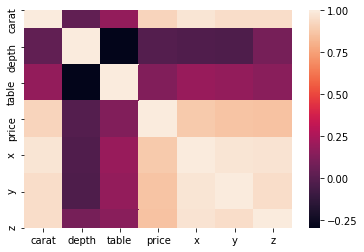

In [4]:
sns.heatmap(df.corr())

#### create an algorithm to determine the price of diamond

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label= LabelEncoder()

In [9]:
df['cut_quality']=label.fit_transform(df.cut)

In [10]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_quality
51410,0.73,Premium,I,VS1,61.2,59.0,2371,5.82,5.84,3.57,3
30125,0.32,Premium,G,VS2,62.0,59.0,720,4.41,4.37,2.72,3
27383,0.41,Very Good,J,VS1,62.0,55.0,647,4.74,4.77,2.95,4
39363,0.50,Premium,E,SI1,62.2,58.0,1073,5.03,4.87,3.10,3
6105,0.90,Very Good,F,SI2,62.0,59.0,3977,6.20,6.10,3.81,4


In [11]:
df['clarity_of_diamond']=label.fit_transform(df.clarity)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_quality,clarity_of_diamond
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,3


In [13]:
X= df.iloc[:,[0,4,5,7,8,9,10,11]]
X.head()

,carat,depth,table,x,y,z,cut_quality,clarity_of_diamond
0,0.23,61.5,55.0,3.95,3.98,2.43,2,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,3


In [14]:
y=df.iloc[:,[6]]
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
log= LinearRegression()

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=45)

In [17]:
log.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predicted_price=log.predict(X_test)
predicted_price

array([[ 1198.33134706],
       [ 1109.36784553],
       [10106.31183106],
       ...,
       [ 3103.76468807],
       [  -86.45103669],
       [ 5043.36851212]])

In [19]:
from sklearn.metrics import r2_score


In [20]:
round(r2_score(predicted_price,y_test),2)

0.85